# <center> Video Game Analysis </center>

Getting necessary libraries and dependencies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#load the dataset
data = pd.read_csv('../input/Video_Games_Sales_as_at_22_Dec_2016.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

The dataset consists of Name of the games, on which Platform they were release and on which Year and Genre. Who published that game and different Regional Sales with Ratings etc..

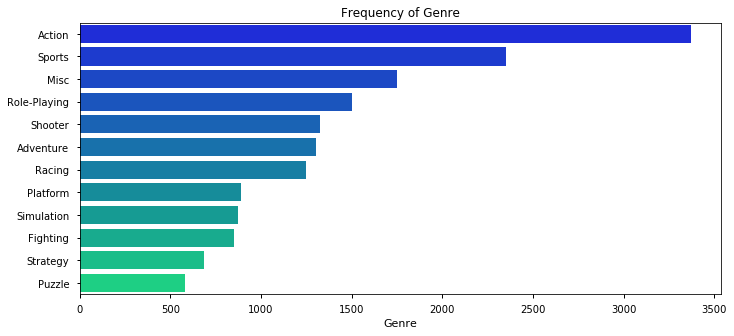

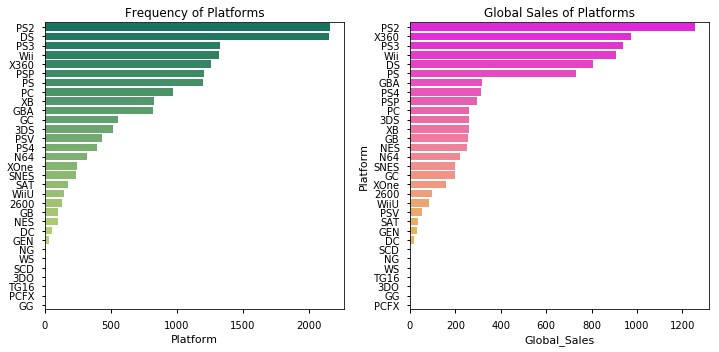

In [4]:
plt.style.use('seaborn-notebook')
plt.figure(figsize = [11.5,5])
Genre = data['Genre'].value_counts()
sns.barplot(x = Genre, y = Genre.index, palette = 'winter', )
plt.title('Frequency of Genre')
f,ax = plt.subplots(1,2,figsize = [10.1,5])
Platform = data['Platform'].value_counts()
sns.barplot(x = Platform, y = Platform.index, palette = 'summer',ax = ax[0])
ax[0].set_title('Frequency of Platforms')
Sales_by_platform = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False)
sns.barplot(x = Sales_by_platform, y = Sales_by_platform.index, palette = 'spring',ax = ax[1])
ax[1].set_title('Global Sales of Platforms')
plt.tight_layout()

From the above graphs we can see that, Action games were preduced often followed by Sports, Misc and so on. 
* Seeing the freqency of Platforms and their Global Sales we can say that most of the games were produced for PS2 followed by DS. and looking at the frequencies of platforms closely DS is gives PS2 quite a competition but their Global Sales aren't on par with PS2, 
* As DS is ranked 5th. While X360 has better Global Sales are decent even with not having many games compared to PS2.

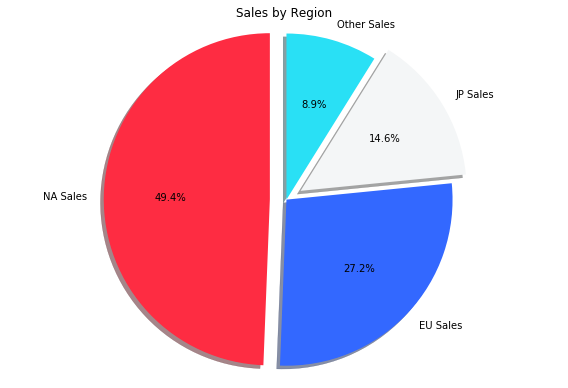

In [5]:
Pies = data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
plt.pie(Pies,startangle = 90,autopct='%1.1f%%',explode = [0.1,0,0.1,0], shadow = True, 
        labels = ['NA Sales','EU Sales', 'JP Sales','Other Sales'], 
        colors = ['#fe2c42','#3368ff','#f4f6f7','#29e0f5'])
plt.axis('equal',)
plt.title('Sales by Region')
plt.tight_layout()

Most of the Sales are from *NA Region* . Other Regions such as *JP* and *Other Regions.* It could mean that,

* Most games are pirated by those regions with low Sales.
* Since most of the games produced are Action based, Regions other than NA do not like it.
* The price at which the games are sold in other regions could also effect the Sales.

In [6]:
#Grouping the data by Genre on a Yearly basis and summing their Global Sales. The same operation is performed on temp_1.
temp = data.groupby(['Year_of_Release','Genre'])['Global_Sales'].sum()
#Grouping the 'Year of Release' and getting the MAX value of Global Sales.
temp = temp.loc[temp.groupby('Year_of_Release').idxmax()].reset_index()

temp_1 = data.groupby(['Year_of_Release','Platform'])['Global_Sales'].sum()
temp_1 = temp_1.loc[temp_1.groupby('Year_of_Release').idxmax()].reset_index()

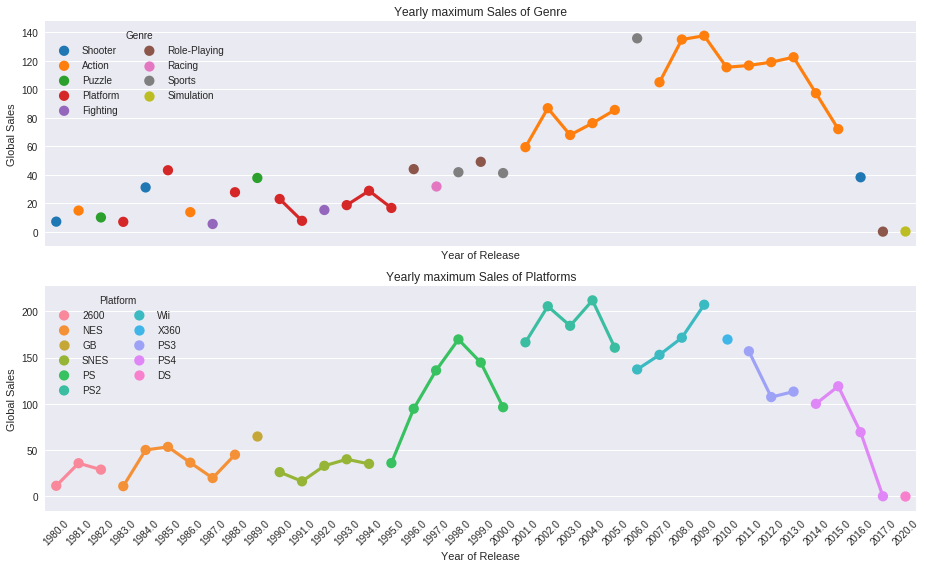

In [7]:
plt.style.use('seaborn-darkgrid')
f, ax = plt.subplots(2, 1, figsize = [13,8], sharex = True)

x = sns.pointplot(x = 'Year_of_Release', y = 'Global_Sales', hue = 'Genre', data = temp, ax = ax[0])
ax[0].set_title('Yearly maximum Sales of Genre',)
ax[0].set_xlabel('Year of Release')
ax[0].set_ylabel('Global Sales')
ax[0].legend(loc = 0,ncol = 2, title = 'Genre')
plt.setp(ax[0].get_xticklabels(), rotation = 45)

sns.pointplot(x = 'Year_of_Release', y = 'Global_Sales', hue = 'Platform', data = temp_1, ax = ax[1])
ax[1].legend(loc = 0, ncol = 2, title = 'Platform')
ax[1].set_title('Yearly maximum Sales of Platforms')
ax[1].set_xlabel('Year of Release')
ax[1].set_ylabel('Global Sales')
#ax[1].set_rotation(45)
plt.setp(ax[1].get_xticklabels(), rotation = 45)
f.tight_layout()

% Regional Sales


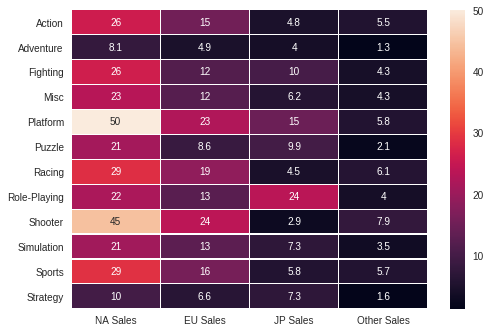

In [8]:
EU = data.groupby('Genre')['EU_Sales'].sum()*100/data['Genre'].value_counts()
NA = data.groupby('Genre')['NA_Sales'].sum()*100/data['Genre'].value_counts()
JP = data.groupby('Genre')['JP_Sales'].sum()*100/data['Genre'].value_counts()
Other = data.groupby('Genre')['Other_Sales'].sum()*100/data['Genre'].value_counts()
print('% Regional Sales')
sns.heatmap(pd.DataFrame([NA,EU,JP,Other],index = ['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales']).T,annot = True,linewidths = 0.2,)


We can notice that,
* *NA Region* has bought Misc, Shooter and Sports games more than Action. 
* *EU Region* likes MIsc more followed by Shooting games.
* *JP Region* likes Simulation games followed by Misc again.
* *Other Region* likes Misc followed by Sports, Shooter and Racing.

In [9]:
data.dropna(inplace = True)

In [10]:
data['User_Score'] = pd.to_numeric(data['User_Score'], errors = 'ignore')

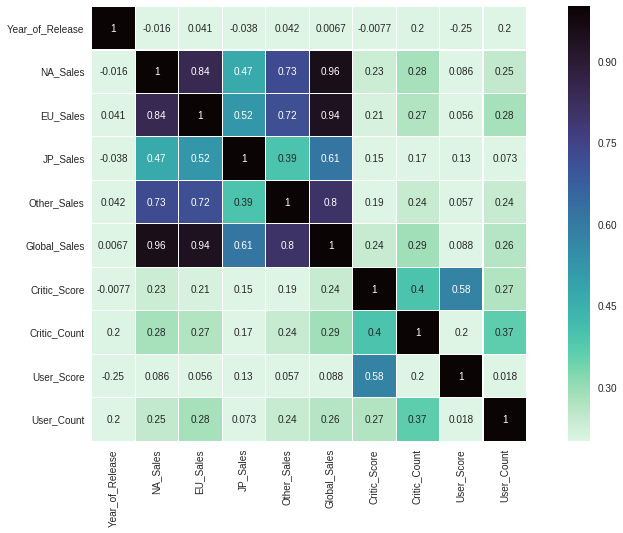

In [11]:
data_corr = data.corr()
plt.figure(figsize = [15,8])
sns.heatmap(data_corr,square = True, annot = True, cmap = 'mako_r',vmin = 0.2, linewidths = 0.2)

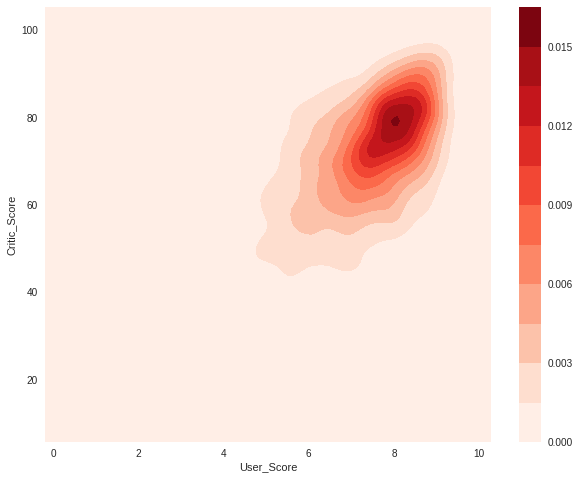

In [12]:
plt.figure(figsize = [10,8])
cmap = sns.cubehelix_palette(n_colors = 20, start = 0, light = 0.9, gamma = 1, rot = 0.1, hue = 1, as_cmap = True)
sns.kdeplot(data = data['User_Score'], data2 = data['Critic_Score'], shade = True, cbar = True,
            cmap = 'Reds')

In [13]:
data['Company'] = data['Platform'].replace(['PC','XOne','X360','XB'], 'Microsoft').replace(
    ['DS', 'Wii', 'WiiU', '3DS', 'GC', 'GBA'],'Nintendo').replace(
    ['PS2', 'PS3', 'PS4','PSP','PS','PSV','DC'],'Sony')

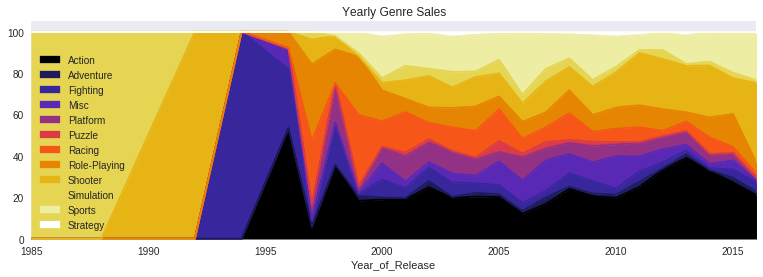

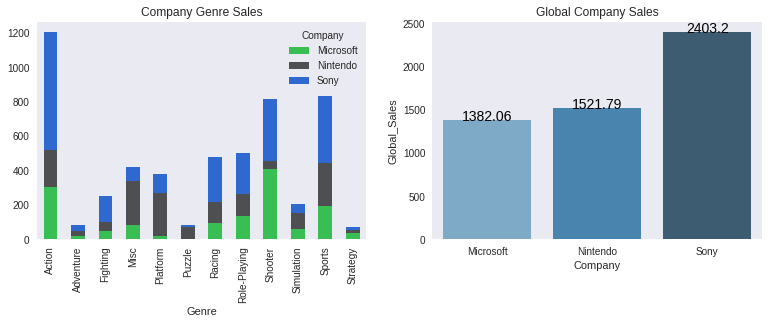

In [14]:
plt.style.use(['seaborn-dark'])
genre_sales_by_year = data.groupby(['Year_of_Release','Genre'])['Global_Sales'].sum()*100/data.groupby(['Year_of_Release'])['Global_Sales'].sum()
# target*100/total
genre_sales_by_year = genre_sales_by_year.unstack()
Company_Sales_by_genre = data.groupby(['Genre','Company'])['Global_Sales'].sum().unstack()
Company_sales = data.groupby('Company')['Global_Sales'].sum()
Company_sales = Company_sales.reset_index()

genre_sales_by_year.plot(kind = 'area', stacked = True, colormap = 'CMRmap', figsize = (13,4),grid = False)
plt.title('Yearly Genre Sales')
plt.legend(loc = 0, shadow = True)


f,ax = plt.subplots(1,2,figsize = [13,4])

Company_Sales_by_genre.plot(kind = 'bar', stacked = True,color = ['#38be52','#4e4f51','#2f69cf'],ax = ax[0] )
ax[0].set_title('Company Genre Sales')

pal = sns.color_palette('Blues_d',len(Company_sales))
rank = Company_sales['Global_Sales'].argsort().argsort()
#first argsort() to arrange them from low to high second to get their rank

g = sns.barplot(x = 'Company', y = 'Global_Sales', data = Company_sales, palette = np.array(pal[::-1])[rank])
for index, row in Company_sales.iterrows():
    g.text(row.name, row.Global_Sales, round(row.Global_Sales,2), color='black', ha="center", size = 14)
ax[1].set_title('Global Company Sales')

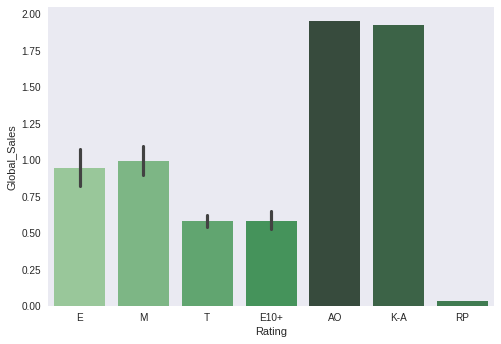

In [15]:
pal = sns.color_palette('Greens_d',len(data['Rating'].unique()))
rank = data['Rating'].value_counts().argsort().argsort()
sns.barplot(x = 'Rating', y = 'Global_Sales', data = data, palette = np.array(pal)[rank])

In [16]:
popular_games = data.duplicated('Name')
popular_games = data[popular_games]
most_popular_games = popular_games.loc[popular_games['User_Count'] > 3000].copy()
most_popular_games.sort_values(by = 'User_Count', ascending = False, inplace = True)
most_popular_games[['Name','User_Count','Critic_Score','Year_of_Release']][:10]

,Name,User_Count,Critic_Score,Year_of_Release
2851,The Witcher 3: Wild Hunt,10665.0,93.0,2015.0
313,The Elder Scrolls V: Skyrim,9073.0,94.0,2011.0
1530,Fallout 4,7512.0,84.0,2015.0
3067,BioShock Infinite,7322.0,94.0,2013.0
2356,Call of Duty: Modern Warfare 2,6430.0,86.0,2009.0
2703,Portal 2,5999.0,95.0,2011.0
2126,Mass Effect 3,5926.0,89.0,2012.0
1040,Call of Duty: Modern Warfare 3,5664.0,78.0,2011.0
37,Call of Duty: Modern Warfare 3,5234.0,88.0,2011.0
538,Battlefield 3,4926.0,89.0,2011.0


From the above DataFrame we observe that Call of Duty: MW3 appeared 3 times because of different platforms. Their addition of 'User Counts' even exceed the 'User Counts' of The Witcher 3. In the later analysis we do not need 1 games appear more than once.

In [17]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Company'],
      dtype='object')

In [18]:
new_data = data.drop(['Publisher','Critic_Score','Critic_Count','User_Score',
                      'User_Count','Developer','Rating','Company'],axis = 1).copy()
new_data.sort_values(by = ['Name','Global_Sales'],inplace = True, ascending = False)
new_data.drop_duplicates(subset = ['Name'], keep = 'first', inplace = True)
TenYearGamesFrom2001 = new_data[new_data['Year_of_Release'].isin([x for x in range(2000,2011,1)])]

In the *'new_data'* any Repeated Names have been taken out so that it will not affect further analysis.

In [19]:
TenYearGamesFrom2001['Platform'].value_counts().head(5)

PS2     1050
DS       349
Wii      331
X360     312
PSP      257
Name: Platform, dtype: int64

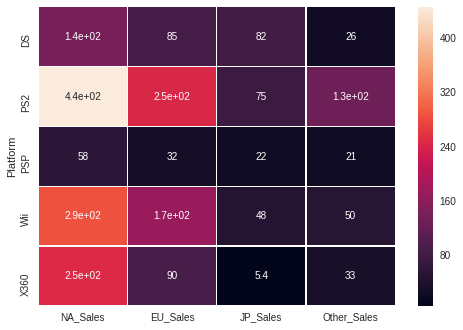

In [20]:
TenYearGamesFrom2001 = TenYearGamesFrom2001.loc[TenYearGamesFrom2001['Platform'].isin(['PS2','DS','Wii','X360','PSP'])]
TenYearGamesFrom2001 = TenYearGamesFrom2001.groupby(['Platform']).agg(np.sum)
sns.heatmap(TenYearGamesFrom2001.iloc[:,1:5],linewidths = 0.2, annot = True)

In [21]:
TenYearGamesFrom2011 = new_data[new_data['Year_of_Release'].isin([x for x in range(2011,2021,1)])]
TenYearGamesFrom2011['Platform'].value_counts().head(5)

PS3     218
PS4     204
3DS     125
X360    124
PC       81
Name: Platform, dtype: int64

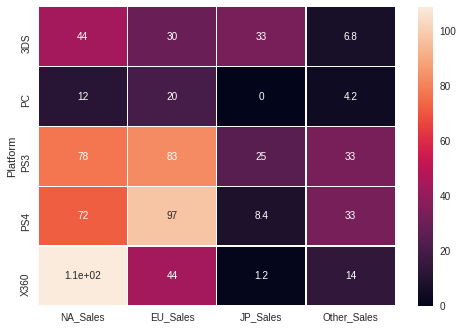

In [22]:
TenYearGamesFrom2011 = TenYearGamesFrom2011.loc[TenYearGamesFrom2011['Platform'].isin(['PS3','PS4','3DS','X360','PC'])]
TenYearGamesFrom2011 = TenYearGamesFrom2011.groupby(['Platform']).agg(np.sum)
sns.heatmap(TenYearGamesFrom2011.iloc[:,1:5], linewidths = 0.2, annot = True)

* From the above visualizations we can say that despite PS2 having highest Global Sales. Most of those Sales were in the year 2000 to 2010 and in those years it made enough Sales Globally to reach the top overall. 
* As we go ahead in time from year 2011 and further we can see that PS2 is nowhere in top Sales but the future versions PS4 and PS3.out of those *two* PS3 still has a better performance.

 <h1><center>Xbox 360 Wins. </center></h1>